# Basic dataset inspection and visualization

Import basic modules and dependencies used work with files and plots.

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

2023-09-02 14:54:41.098001: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Set up our dataset path that we want to inspect and display, we need to pay a little bit of attention to paths since we are in container.

*/data/classes* - directory contains labeled examples of images that are produced by Dahua AllSkyCam. Images are grouped by class such as "Plane", "Bird", "LensFlare" and so on. When you position yourself in one of Class directories you will see flat hierarchy, all image examples from that folder contain one and the same object.

This is also dataset that is used to train single frame classifiers. From classes dataset is produced another dataset that is fed to time-series classifiers. Transformation of dataset is done by dataset preprocessing scripts that groups image examples from same track into same directory. For more info about this check out README.md in the root of repository.

In [10]:
classes_dataset = os.path.abspath("../data/classes")

'/tf/data/classes'

Display what classes are present in dataset and store them for later use.

In [8]:
classes = os.listdir(classes_dataset)

['Droplet', 'Edge', 'Bird', 'Lens', 'Plane', 'UAP', 'Cloud', 'Empty']

After finding list of possible classes we can display number of examples for each class, to see how balanced dataset is.

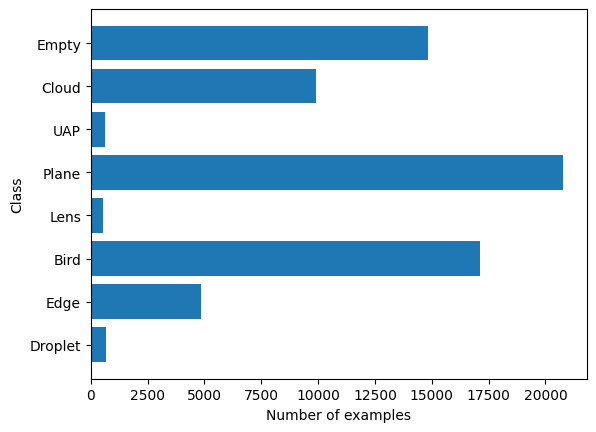

In 8 different classes there are 69357 of images


In [13]:
class_info = []

for c in classes:
    class_path = os.path.join(classes_dataset,c)
    examples = os.listdir(class_path)
    class_info.append((c,len(examples)))
    
class_names, num_examples = zip(*class_info)

fig, ax = plt.subplots()

ax.barh(class_names, num_examples)
ax.set_xlabel('Number of examples')
ax.set_ylabel('Class')

plt.show()


total_classes = len(class_names)
total_images = sum(num_examples)

message = f"In {total_classes} different classes there are {total_images} of images"
print(message)

Since tracker can track more than 1 objects at the same time, we need to create model that is fast and efficient, simple rule for that is to keep number of parameters low, after all final home for classifier model is on the edge device. Because of that we decided that input shape of initial model should be 64x64 pixels on RGB images.

In [14]:
image_sizes = []
image_dimensions = []

for c in classes:
    class_path = os.path.join(classes_dataset,c)
    examples = os.listdir(class_path)
    for example in examples:
        img = tf.keras.preprocessing.image.load_img(os.path.join(classes_dataset, c, example))
        arr = tf.keras.preprocessing.image.img_to_array(img)
        height, width, channels = arr.shape
        image_sizes.append(height * width)
        image_dimensions.append((height, width))



Histogram plot showing image area in pixels and number of pictures that have that area

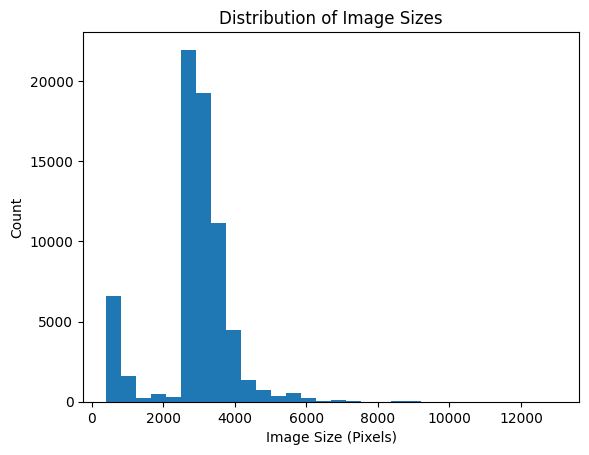

In [15]:
fig, ax = plt.subplots()

ax.hist(image_sizes, bins=30)

ax.set_xlabel('Image Size (Pixels)')
ax.set_ylabel('Count')
ax.set_title('Distribution of Image Sizes')

plt.show()

Plot showing image W and H in 2D plane.

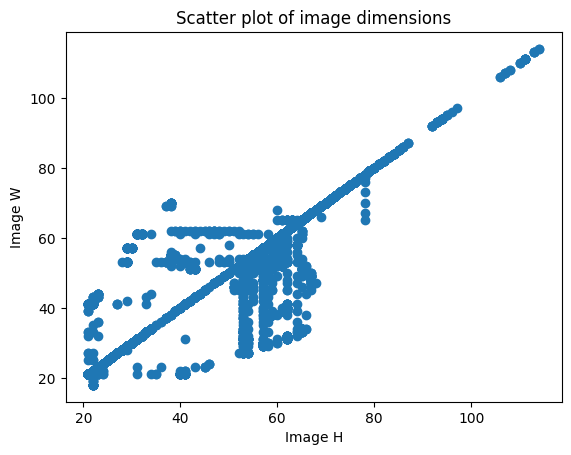

In [16]:
h_values, w_values = zip(*image_dimensions)

plt.scatter(h_values, w_values)

plt.xlabel('Image H')
plt.ylabel('Image W')
plt.title('Scatter plot of image dimensions')

plt.show()

In [20]:
import numpy as np

first_elements = [x[0] for x in image_dimensions]
second_elements = [x[1] for x in image_dimensions]

median_height = np.median(first_elements)
median_width = np.median(second_elements)

print(f"Median image height: {median_height}")
print(f"Median image width: {median_width}")

Median image height: 54.0
Median image width: 54.0
